In [1]:
## Loading libraries and importing the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import numpy as np

In [3]:
data = pd.read_csv("C:/Users/nikha/Desktop/Course Material/Fall 2019/Data Visualisation/Project/Avocado.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15886 entries, 0 to 15885
Data columns (total 14 columns):
Number          15886 non-null int64
Date            15886 non-null object
AveragePrice    15886 non-null float64
Total Volume    15886 non-null float64
4046            15886 non-null float64
4225            15886 non-null float64
4770            15886 non-null float64
Total Bags      15886 non-null float64
Small Bags      15886 non-null float64
Large Bags      15886 non-null float64
XLarge Bags     15886 non-null float64
type            15886 non-null object
year            15886 non-null int64
region          15886 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.7+ MB


In [5]:
## So there are no missing values in the data for any of the attributes

In [6]:
## 2.1 Understanding data

In [7]:
data.shape

(15886, 14)

In [8]:
data.describe()

,Number,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,15886.000000,15886.000000,1.588600e+04,1.588600e+04,1.588600e+04,15886.000000,1.588600e+04,1.588600e+04,15886.000000,15886.000000,15886.000000
mean,24.236686,1.416227,3.512031e+05,1.126373e+05,1.284249e+05,11701.749188,9.843779e+04,7.799083e+04,18794.986485,1651.972953,2016.147929
std,15.483735,0.405568,8.125458e+05,3.203229e+05,3.037963e+05,42460.526326,2.326225e+05,2.024900e+05,50911.680049,7378.016256,0.939946
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000
25%,10.000000,1.110000,9.142783e+03,6.102375e+02,2.362540e+03,0.000000,3.985697e+03,2.045557e+03,60.000000,0.000000,2015.000000
50%,24.000000,1.380000,7.998448e+04,5.361255e+03,2.199192e+04,108.930000,2.838660e+04,1.919149e+04,1830.720000,0.000000,2016.000000
75%,38.000000,1.670000,3.335263e+05,8.257127e+04,1.068906e+05,4129.662500,8.717496e+04,6.773426e+04,13218.002500,70.000000,2017.000000
max,52.000000,3.250000,1.121360e+07,4.794142e+06,4.097592e+06,704466.560000,3.462626e+06,3.403581e+06,832296.700000,131300.760000,2018.000000


In [9]:
data.head(5)

,Number,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
## There are 14 columns in the original dataset. Since the "Number" column is being redundant, I will remove that column. Also, I will breakdown the date into 2 separate columns - Day and Month to understand and analyse if there is any trend or seasonality in the dataset

In [11]:
data = data.drop(["Number"], axis = 1)

In [12]:
data.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
## Breaking down 'Date' column into Year, Month and Day to understand the trend and seasonality in the datavar

In [14]:
data['Year'] = data['Date'].apply(lambda x : x.split("/")[2])
data['Month'] = data['Date'].apply(lambda x : calendar.month_name[datetime.strptime(x,"%m/%d/%Y").month])
data['Day'] = data['Date'].apply(lambda x : calendar.day_name[datetime.strptime(x,"%m/%d/%Y").weekday()])

In [15]:
data = data.drop(['year'], axis = 1)

In [16]:
## We observe that all the data here is for Sunday of every week over 2015-2018

In [17]:
data = data.rename(columns={"AveragePrice": "Average Price", "type": "Type", "region": "Region"})

In [18]:
data = data[["Day", "Month", "Year", "Date", "Average Price", "Total Volume", "4046", "4225", "4770", "Total Bags", "Small Bags", "Large Bags", "XLarge Bags", "Type", "Region"]]

In [19]:
data.head(5)

,Day,Month,Year,Date,Average Price,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Region
0,Sunday,December,2015,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,Sunday,December,2015,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,Sunday,December,2015,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,Sunday,December,2015,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,Sunday,November,2015,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [76]:
data['Total Sales'] = data['Average Price'] * data['Total Volume']

In [77]:
## 3. Preliminary Analysis

In [78]:
## First, lets look at the distribution of prices over 2015-2018

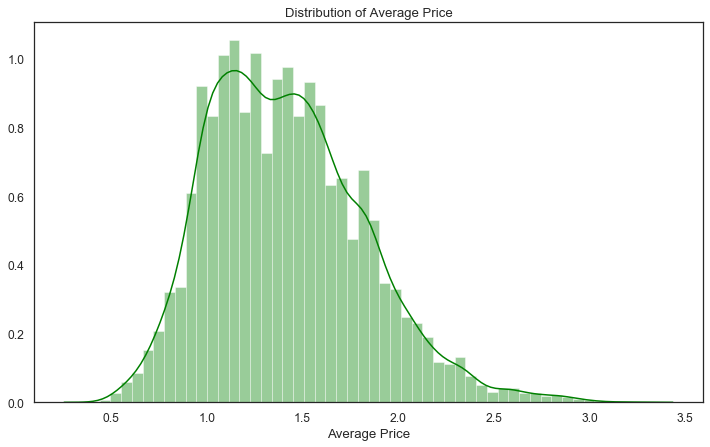

In [79]:
plt.figure(figsize = (12,7))
plt.title("Distribution of Average Price")
fig1 = sns.distplot(data["Average Price"], color = 'green')
sns.set_style("white")

In [80]:
## ## The above histogram shows that the average Avocado price is nearly normally distributed with the average prices ranging between $1.1-1.6. We can also use a boxplot to verify this and visualise the outliers 

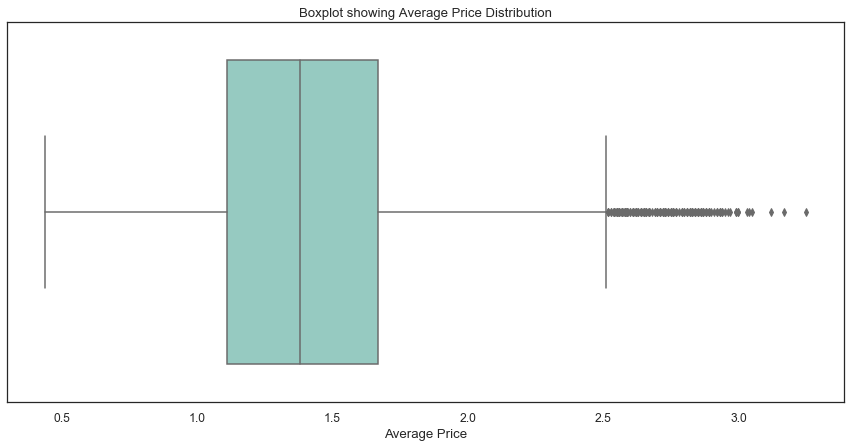

In [81]:
plt.figure(figsize = (15,7))
plt.title("Boxplot showing Average Price Distribution")
sns.boxplot(data["Average Price"], palette = 'Set3')
sns.set_style("white")

In [82]:
## seeing the share of conventional vs organic avocados - whether use or not

In [83]:
share = data.groupby('Type')['Total Volume'].agg('sum')

<Figure size 1440x1440 with 0 Axes>

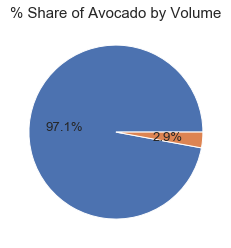

<Figure size 1440x1440 with 0 Axes>

In [84]:
plt.pie(share, autopct='%1.1f%%')
values= [share['conventional'],share['organic']]
labels= ['conventional','organic']
plt.title('% Share of Avocado by Volume',fontsize=15)
plt.figure(figsize=(20,20))

In [85]:
## Seeing the trend of avocado prices by type 

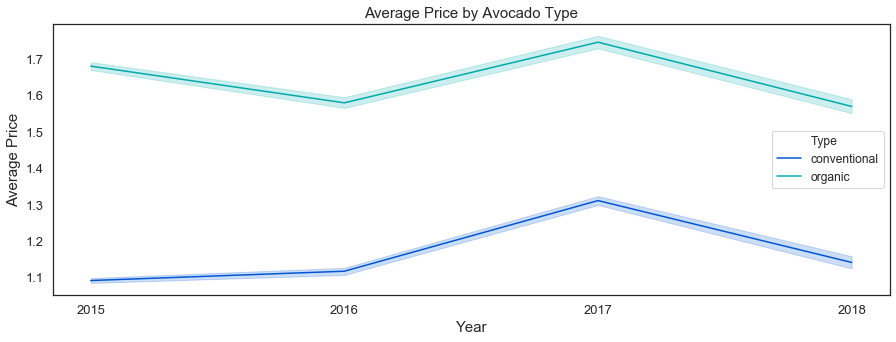

In [86]:
plt.figure(figsize = (15,5))
sns.lineplot(x= "Year", y= "Average Price", hue='Type', data=data, palette = 'winter')
plt.title("Average Price by Avocado Type", size = 15)
plt.xlabel('Year', size = 15)
plt.ylabel('Average Price', size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
sns.set_style("white")

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 <a list of 8 Text yticklabel objects>)

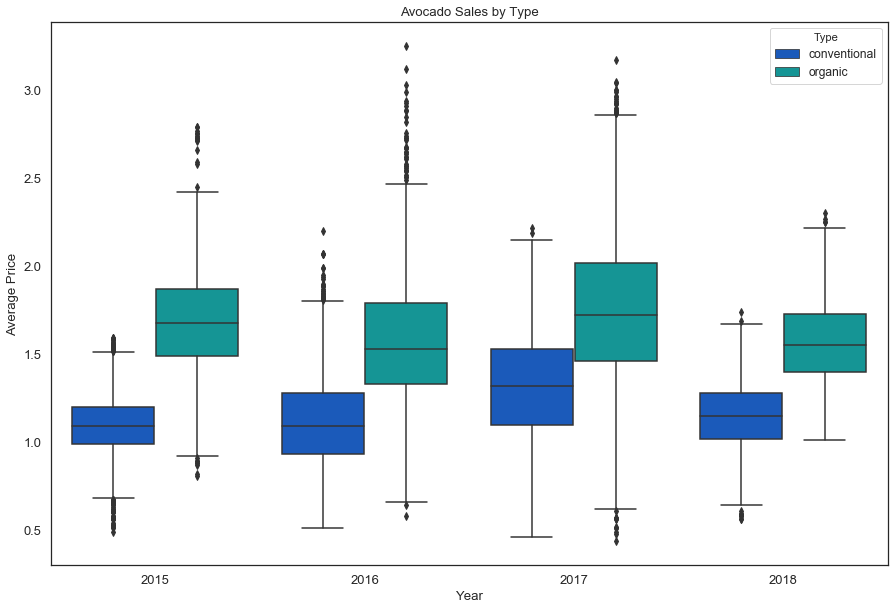

In [87]:
plt.figure(figsize = (15,10))
plt.title("Avocado Sales by Type")
sns.boxplot(x= "Year", y= "Average Price", hue='Type', data=data, palette = 'winter')
sns.set_style("white")
plt.xticks(size = 13)
plt.yticks(size = 13)

In [88]:
## In the above figure, irrespective of the type, there was a peak in the avocado prices in 2017. Seeing the above chart, my assumption is correct that organic avocados are priced higher than the conventional ones

In [89]:
## Now, lets dive deep into the region-wise price dynamics for avocados. First, we lets see which are the top 10 regions for avocados by volume in 2018

In [90]:
## creating a dataframe with only Year 2018 data in it 
volume_2017 = data.loc[(data['Year'] == '2017')]
## grouping the dataframe by region and sorting it by total Volume
top_region = volume_2017.groupby(['Region'], as_index = False).sum().sort_values('Total Volume', ascending = False)
## since the first row of the data contains total US data, I am skipping the first row and selecting next 10 rows showing the regions which had the highest avocado sales in 2018
top_sales = top_region.iloc[[1,2,3,4,5,6,7,8,9,10], [0,2]]
top_sales

,Region,Total Volume
15,GreatLakes,1.893539e+08
22,LosAngeles,1.584812e+08
33,Plains,1.002800e+08
27,NewYork,7.485067e+07
18,Houston,6.909309e+07
11,DallasFtWorth,6.624098e+07
31,PhoenixTucson,6.117053e+07
12,Denver,4.255908e+07
40,SanFrancisco,4.187150e+07
2,BaltimoreWashington,4.101563e+07


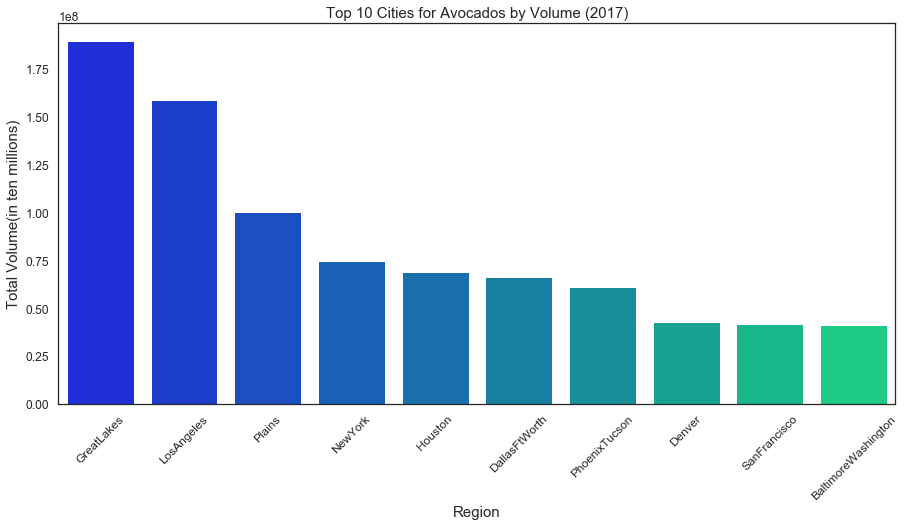

In [91]:
##Plotting the top 10 regions from above
plt.figure(figsize=(15,7))
sns.barplot(x= 'Region', y= 'Total Volume', data = top_sales, palette = 'winter')
plt.title("Top 10 Cities for Avocados by Volume (2017)", size = 15)
plt.xlabel('Region', size = 15)
plt.ylabel('Total Volume(in ten millions)', size = 15)
plt.xticks(rotation=45, size = 12)
sns.set_style("white")

In [92]:
## California as all hass avocados are grown there

In [93]:
## Avocado Prices by Region - dont show this

In [94]:
price_region = data.groupby(['Region'], as_index = False).mean().sort_values('Average Price', ascending = False)
price_region1 = price_region.iloc[:,0:2]

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]),
 <a list of 9 Text yticklabel objects>)

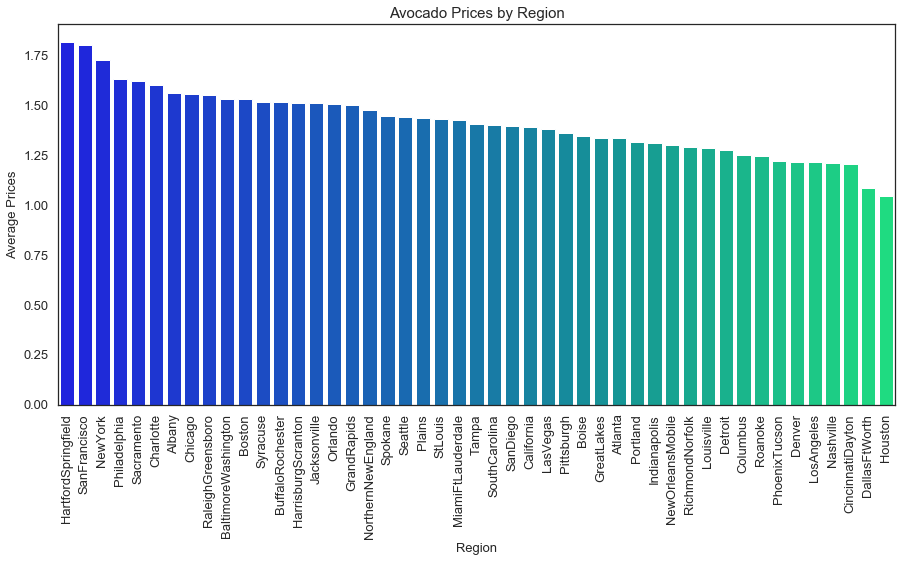

In [95]:
plt.figure(figsize=(15,7))
sns.barplot(x= 'Region', y= 'Average Price', data = price_region1, palette = 'winter')
plt.title("Avocado Prices by Region", size = 15)
plt.xlabel('Region', size = 13)
plt.ylabel('Average Prices', size = 13)
plt.xticks(rotation=90, size = 13)
plt.yticks(size = 13)

In [96]:
## Seeing the average distribution of prices for conventional and organic avocados by region across years

In [97]:
conv_type = data[data["Type"].isin(["conventional"])]
conv_type= conv_type.sort_values('Average Price')

C:\Users\nikha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text yticklabel objects>)

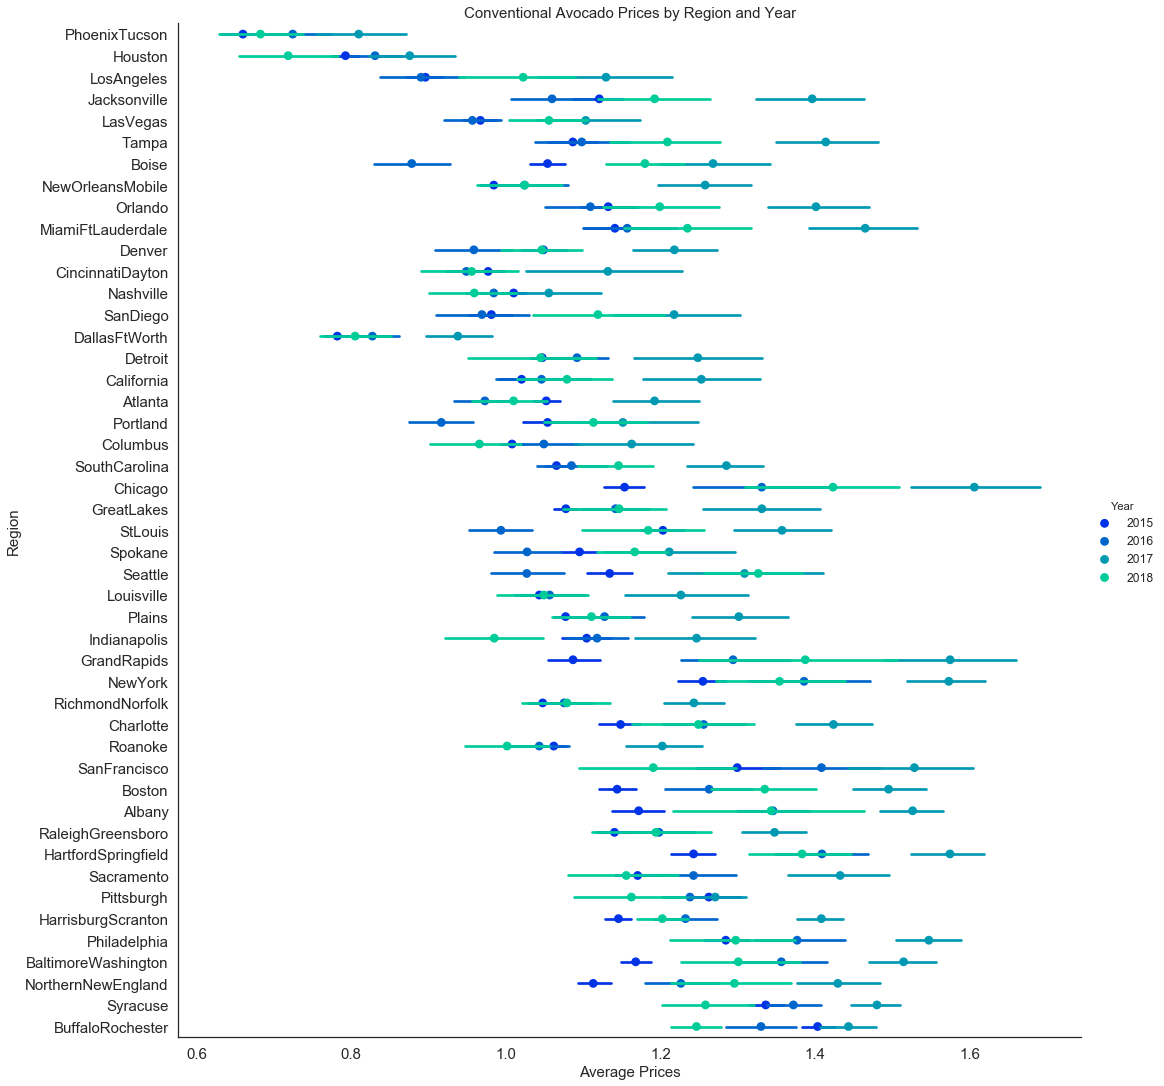

In [98]:
sns.factorplot(x= "Average Price", y= "Region", data=conv_type, hue = "Year", height = 15, palette = "winter", join = False)
plt.title("Conventional Avocado Prices by Region and Year", size = 15)
plt.xlabel('Average Prices', size = 15)
plt.ylabel('Region', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)

In [99]:
org_type = data[data["Type"].isin(["organic"])]
org_type= org_type.sort_values('Average Price')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text yticklabel objects>)

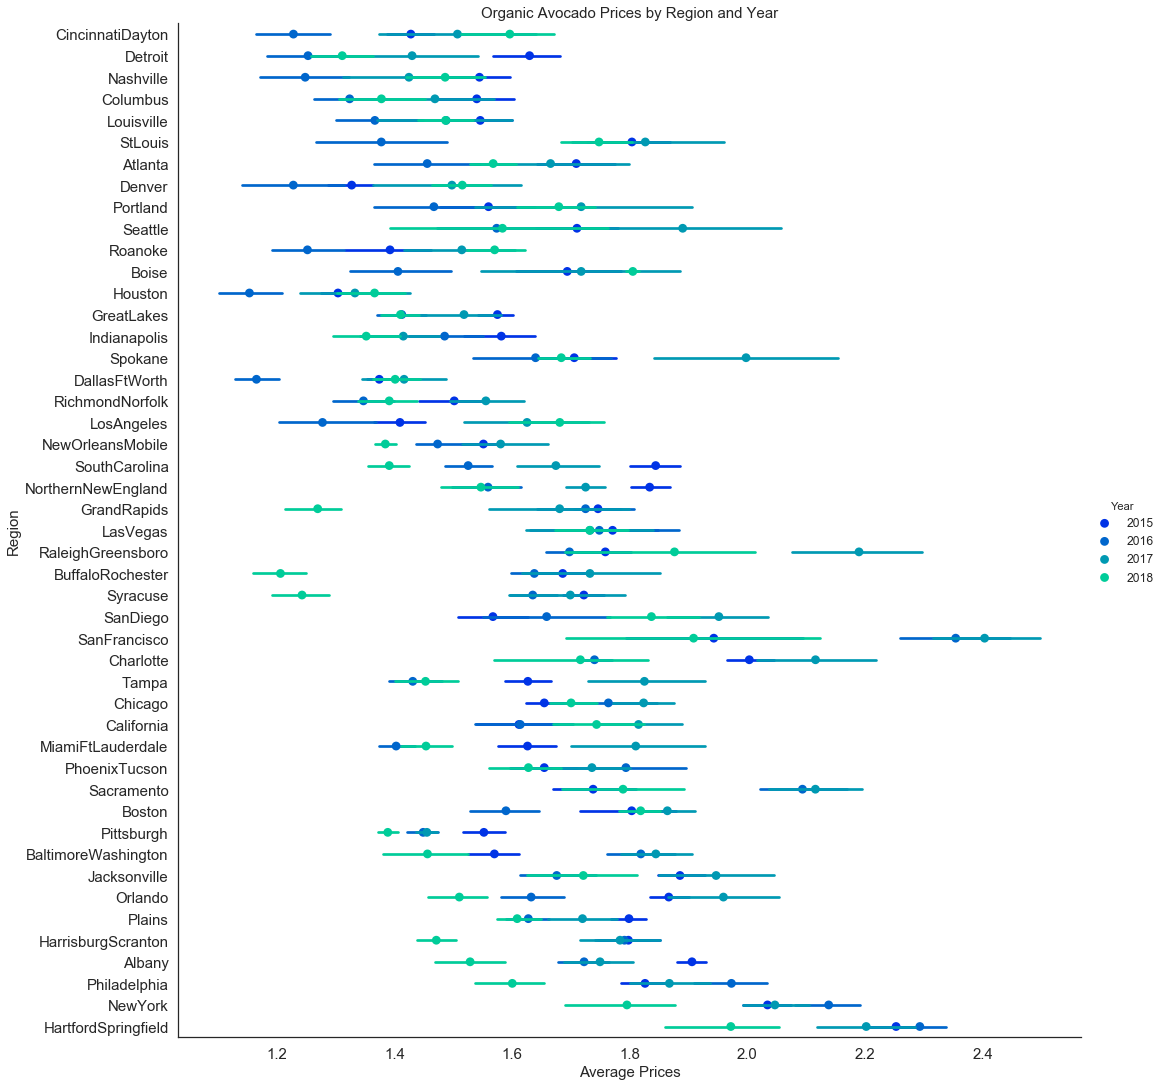

In [100]:
sns.factorplot(x= "Average Price", y= "Region", data=org_type, hue = "Year", height = 15, palette = "winter", join = False)
plt.title("Organic Avocado Prices by Region and Year", size = 15)
plt.xlabel('Average Prices', size = 15)
plt.ylabel('Region', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)

In [101]:
## Examining the relationship between average prices and total volume

C:\Users\nikha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Relationship between Average Price and Volume \n \n \n \n \n \n')

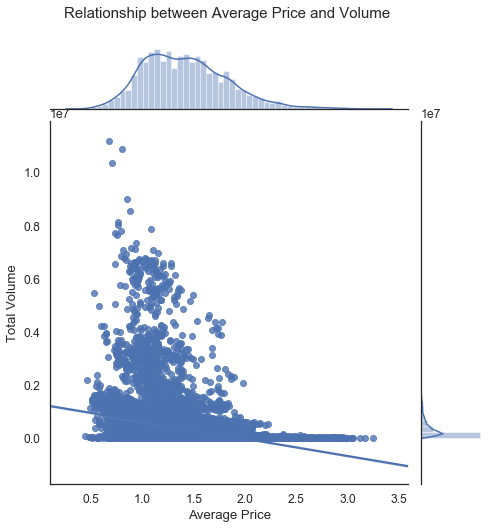

In [102]:
sns.jointplot(x="Average Price", y= "Total Volume", data= data, kind = "reg", size = 7)
plt.title("Relationship between Average Price and Volume \n \n \n \n \n \n", size = 15)

C:\Users\nikha\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"
C:\Users\nikha\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:60: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


Text(0, 0.5, 'Year')

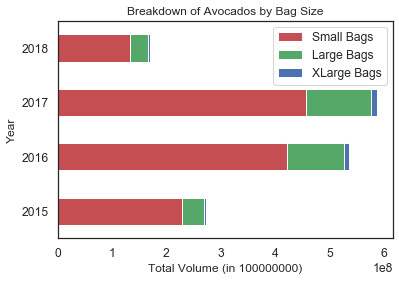

In [103]:
## data["total"] = data["Small Bags"] + data["Large Bags"] + data["XLarge Bags"]
table_2 = data[["Small Bags", "Large Bags", "XLarge Bags", "Year"]]
table_3 = table_2.groupby("Year").sum()
table_3.plot.barh(colors = "RGB", stacked = True)
# plt.figure(figsize=(20,20))
## sns.barplot(x= 'Region', y= 'Average Price', data = price_region1, palette = 'winter')
plt.title("Breakdown of Avocados by Bag Size", size = 12)
plt.xlabel('Total Volume (in 100000000)', size = 12)
plt.ylabel('Year', size = 12)

Text(0, 0.5, 'Total Volume (in 100000000)')

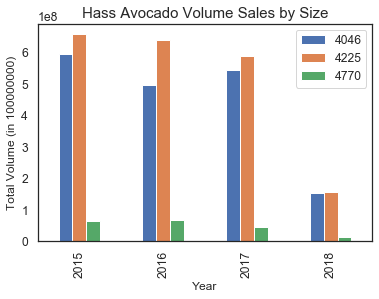

In [104]:
table_4 = data[["4046", "4225", "4770", "Year"]]
table_5 = table_4.groupby("Year").sum()
table_5.plot.bar()
plt.title("Hass Avocado Volume Sales by Size", size = 15)
plt.xlabel('Year', size = 12)
plt.ylabel('Total Volume (in 100000000)', size = 12)

In [105]:
## correlation matrix

Text(0.5, 1, 'Correlation Matrix \n')

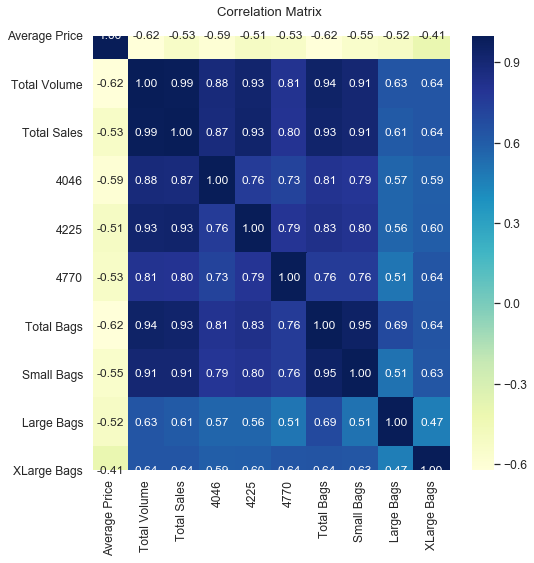

In [127]:
cols = ['Average Price','Total Volume','Total Sales','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','Year','Type']
sns.set(font_scale = 1.1)
corr = data[cols].corr('spearman')
plt.figure(figsize = (8,8)) 
sns.heatmap(corr,annot=True,fmt='.2f',cmap="YlGnBu", cbar = True, annot_kws= {'size':12})
plt.title("Correlation Matrix \n")

In [107]:
data["Total_hass"] = data["4046"] + data["4225"] + data["4770"]

In [108]:
## creating a dataframe with only Year 2017 data in it 
hass_2017 = data.loc[(data['Year'] == '2017')]
## grouping the dataframe by region and sorting it by total Volume
top_hass = hass_2017.groupby(['Region'], as_index = False).sum().sort_values('Total_hass', ascending = False)

In [109]:
top_hass.head(10)

,Region,Average Price,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Total_hass,Total Sales
6,California,162.59,3.176445e+08,1.149494e+08,1.051475e+08,7710648.67,89837034.28,85277470.05,1741183.43,2818380.80,2.278075e+08,3.867748e+08
15,GreatLakes,151.01,1.893539e+08,3.233803e+07,7.248527e+07,13050240.12,71469194.30,45595642.32,23769226.22,2104326.76,1.178735e+08,2.434537e+08
22,LosAngeles,146.00,1.584812e+08,6.225949e+07,2.752390e+07,4629497.16,64068284.42,60751179.65,1170728.03,2146377.74,9.441289e+07,1.704292e+08
33,Plains,160.11,1.002800e+08,4.479101e+07,2.555380e+07,548443.54,29386635.69,25344684.63,3593356.75,448594.31,7.089324e+07,1.285237e+08
27,NewYork,191.85,7.485067e+07,3.703242e+06,4.591806e+07,888655.78,24340714.19,20818003.33,3251680.73,271031.13,5.050996e+07,1.182747e+08
11,DallasFtWorth,124.76,6.624098e+07,3.411756e+07,1.308436e+07,496196.67,18542869.63,15715666.87,2801779.91,25420.85,4.769812e+07,6.148540e+07
18,Houston,117.03,6.909309e+07,3.338081e+07,1.170218e+07,649310.74,23360792.83,14927579.26,8429192.86,4020.71,4.573230e+07,5.920025e+07
31,PhoenixTucson,134.89,6.117053e+07,3.097890e+07,1.202377e+07,665420.69,17502440.56,9809409.63,7620203.33,72828.60,4.366809e+07,4.718973e+07
40,SanFrancisco,208.39,4.187150e+07,1.115382e+07,2.556211e+07,390775.16,4764796.19,4584040.83,49665.61,131089.75,3.710671e+07,6.240070e+07
8,Chicago,181.77,4.098075e+07,4.830354e+06,2.466193e+07,6297647.51,5190793.03,4305788.89,704786.78,180217.36,3.578993e+07,6.368743e+07


In [110]:
## Checking for seasonality in the data

In [ ]:
month_price = data.groupby('Month')[["4046", "4225", "4770"]].agg('sum')
month_price = month_price.loc[['January','February','March',"April",'May','June',"July","August",'September','October','November',"December"]]
month_price

In [ ]:
month_price.plot.bar()
plt.title("Hass Avocado Monthly Sales by Size", size = 15)
plt.ylabel('Total Volume (in 100000000)')
sns.set_style("white")

In [113]:
##Volume of Avocados sold by month
table_4 = data[["4046", "4225", "4770", "Year"]]
table_5 = table_4.groupby("Year").sum()

In [114]:
month_volume = data[["Month", "Total Volume", "Year"]]
month_volume1 = month_volume.groupby("Month").sum()
month_volume1 = month_volume1.loc[['January','February','March',"April",'May','June',"July","August",'September','October','November',"December"]]
month_volume1.head()

,Total Volume
Month,
January,6.368420e+08
February,6.354610e+08
March,5.778319e+08
April,4.378618e+08
May,5.286342e+08


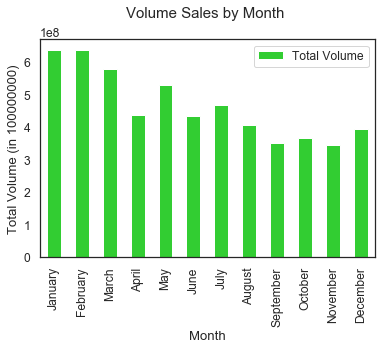

In [129]:
month_volume1.plot.bar(colors = "limegreen")
plt.title("Volume Sales by Month \n", size = 15)
plt.ylabel('Total Volume (in 100000000)')
sns.set_style("white")

In [116]:
month_price = data[["Month", "Average Price"]]
month_price1 = month_price.groupby("Month").mean()
month_price1 = month_price1.loc[['January','February','March',"April",'May','June',"July","August",'September','October','November',"December"]]
month_price1.head()

,Average Price
Month,
January,1.319468
February,1.284215
March,1.344243
April,1.388552
May,1.358754


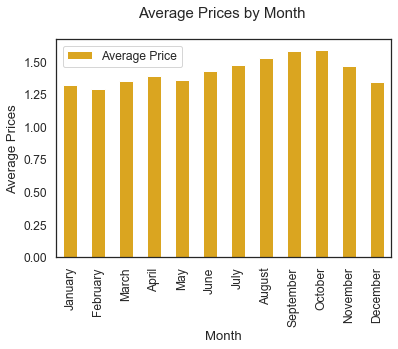

In [117]:
month_price1.plot.bar(colors = "goldenrod")
plt.title("Average Prices by Month \n", size = 15)
plt.ylabel('Average Prices')
sns.set_style("white")

In [118]:
region_pr = data.groupby(['Region'], as_index = False).sum().sort_values('Total Volume', ascending = False)
region_pr1 = region_pr.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12],[0,2]]
region_pr1

,Region,Total Volume
6,California,1.028982e+09
15,GreatLakes,5.896425e+08
22,LosAngeles,5.078965e+08
33,Plains,3.111885e+08
27,NewYork,2.407341e+08
11,DallasFtWorth,2.084193e+08
18,Houston,2.031679e+08
31,PhoenixTucson,1.956433e+08
12,Denver,1.389025e+08
40,SanFrancisco,1.358302e+08


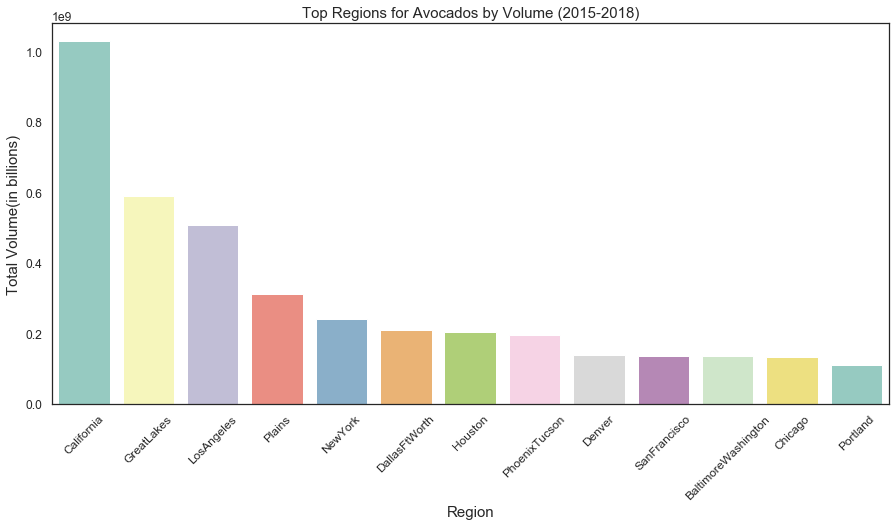

In [119]:
##Plotting the top 10 regions from above
plt.figure(figsize=(15,7))
sns.barplot(x= 'Region', y= 'Total Volume', data = region_pr1, palette = 'Set3')
plt.title("Top Regions for Avocados by Volume (2015-2018)", size = 15)
plt.xlabel('Region', size = 15)
plt.ylabel('Total Volume(in billions)', size = 15)
plt.xticks(rotation=45, size = 12)
sns.set_style("white")

In [120]:
##Small bags vs total volume

<Figure size 720x504 with 0 Axes>

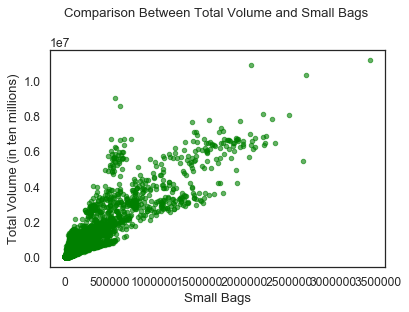

In [121]:
plt.figure(figsize=(10,7))
data.plot(kind = 'scatter', x = 'Small Bags', y = 'Total Volume', color = 'green', alpha = '0.6')
plt.xlabel('Small Bags')
plt.ylabel('Total Volume (in ten millions)')
plt.title("Comparison Between Total Volume and Small Bags \n \n")
plt.show()

In [122]:
## large bags vs total volume

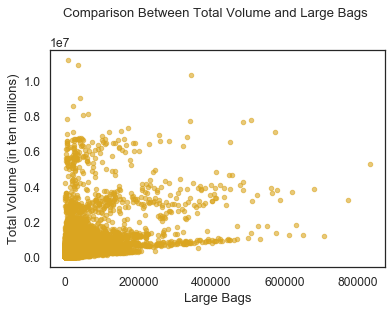

In [123]:
data.plot(kind = 'scatter', x = 'Large Bags', y = 'Total Volume', color = 'goldenrod', alpha = '0.6')
plt.xlabel('Large Bags')
plt.ylabel('Total Volume (in ten millions)')
plt.title("Comparison Between Total Volume and Large Bags \n\n")
plt.show()

In [124]:
##xtra large bags vs total volume

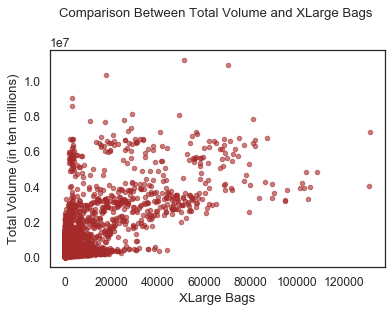

In [125]:
data.plot(kind = 'scatter', x = 'XLarge Bags', y = 'Total Volume', color = 'brown', alpha = '0.6')
plt.xlabel('XLarge Bags')
plt.ylabel('Total Volume (in ten millions)')
plt.title("Comparison Between Total Volume and XLarge Bags \n \n")
plt.show()